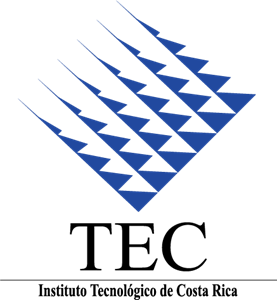

Instituto Tecnológico de Costa Rica

Centro Académico de Alajuela

IC4302. Bases de Datos Ii

Proyecto 3: Extraer, transformar y cargar datos con SparkSQL.

Estudiante: Valery Carvajal Oreamuno - 2022314299

Profesor:
Alberto Shum Chan

Fecha de entrega
06/06/2024 16:59

I Semestre, 2024

I. Instalación de Spark en Windows 10
1. Descargar Apache Spark

  Ir a la página oficial de Apache Spark: https://spark.apache.org/downloads.html.

  Seleccionar la versión de Spark: Escoger la versión que se desee, en mi caso elegí la versión más reciente (3.5.1). Se descarga con el link y se guarda el archivo comprimido (tar.gz) en el sistema. Importante recordar configurar la variable de entorno SPARK_HOME y editar la variable Path y añadir %SPARK_HOME%\bin.

\
2. Instalar Java Development Kit (JDK)

  En mi caso ya lo tenía instalado pero no tenerlo es necesario instalarlo y setear la variable de entorno para Java.

\
3. Configurar Hadoop

  Descargar Hadoop: Ir al siguiente link https://hadoop.apache.org/releases.html. Extraer el archivo descargado en una ubicación adecuada (ejemplo: C:\hadoop) y configurar la variable de entorno HADOOP_HOME que apunta al directorio donde se extrajo Hadoop. Importante recordar editar la variable Path y añadir %HADOOP_HOME%\bin.

  Crear winutils.exe: Descargar el archivo winutils.exe compatible con la versión de Hadoop descargada (https://github.com/cdarlint/winutils/tree/master
  ). Se debe colocar winutils.exe en el directorio bin dentro de HADOOP_HOME.

\
4. Configurar Apache Spark
  
  Extraer Apache Spark: Se extrae el archivo comprimido descargado en una ubicación adecuada (ejemplo: C:\spark) y se configura la variable de entorno SPARK_HOME que apunta al directorio donde extrajiste Spark. Importante recordar editar la variable Path y añadir %SPARK_HOME%\bin.

\
5. Instalar Python

  Para instalar Python, hay que descargar el instalador desde python.org (https://www.python.org/downloads/release/python-3123/
  ), seleccionando la versión más reciente. Se ejecuta el instalador, marcando la casilla Add Python to PATH e Install Now. Importante asegurarse que las rutas de Python y Scripts están en la variable de entorno Path.

\
6. Verificar la Instalación

  Abrir una ventana de comandos (cmd). Para verificar la instalación de Java usa "java -version", esto debería mostrar la versión de Java instalada. Luego, para verificar la instalación de python usa "python --version". Por último, para verificar la instalación de Spark usa "spark-shell", esto debería iniciar el shell interactivo de Spark, mostrando la versión de Spark y otros detalles. Y con esto, se asegura que todo quedó correctamente instalado y funcional.

II. Abrir jupyter notebook

Para esto se ingresa a https://colab.google/ y se presiona "New Notebook", esto generará un nuevo cuaderno en el que se puede ya iniciar a trabajar. Ya estando dentro, es importante utilizar "from google.colab import drive" y "drive.mount('/content/drive')" para tener conexión con nuestro google drive.

III. Descarga de los archivos xls

1. El primer archivo (del INEC) se descargó mediante link directo: https://admin.inec.cr/sites/default/files/media/reempleocenso2011-22.xls_2.xls y se cambió el nombre a "INECdata".


2. El segundo archivo (del OIJ) se descargó de la siguiente página: https://sitiooij.poder-judicial.go.cr/index.php/apertura/transparencia/estadisticas-policiales con los filtros: "Fecha desde 01/01/2011, Fecha hasta 31/12/2011", "Todo el País", "Todas las Categorías" y "Todas las Víctimas". Al presionar Exportar, se marca "Usar todos los delitos y no las categorías delictivas" y se descarga como XLS. Sin embargo, este archivo se descarga con formato página por lo que hay que abrirlo y guardarlo como Hoja de cálculo de Microsoft Excel 97-2003 (.xls). A este se le hizo una pequeña modificación manual de eliminar la celda "Porcentaje de población ocupada" por cuestión de orden y facilidad de control del archivo.


3. Subirlos a google drive
Se crea una carpeta en google drive designada al proyecto (Proyecto3_BD2 - VCO) y se suben los dos archivos xls.

III. Descripción General del Sistema

En este proyecto, el objetivo principal es aplicar los conocimientos adquiridos en el curso de Base de Datos II para manejar conjuntos de datos del mundo real. Esto implica un proceso meticuloso que va desde la descarga de los datos hasta su integración y limpieza, garantizando que estén listos para su análisis.

Una parte crucial del proyecto implica la integración de los datos de INEC y OIJ, asegurando que los nombres de los distritos coincidan para facilitar el análisis posterior. Esto requiere la implementación de funciones personalizadas para el preprocesamiento de los datos, como la eliminación de espacios en blanco, la conversión a minúsculas y la eliminación de acentos.

Una vez que los datos están limpios y listos, se almacenan en una base de datos PostgreSQL para su fácil acceso y gestión. Pero el trabajo no termina aquí. También entramos en la visualización de datos, utilizando Spark para crear gráficos informativos que ayuden a comprender mejor las tendencias y patrones presentes en los conjuntos de datos.

Este proyecto es una oportunidad emocionante para aplicar los conceptos teóricos aprendidos en clase a situaciones del mundo real. Al final, no solo adquirimos habilidades técnicas en SparkSQL y manipulación de datos, sino también una comprensión más profunda de la complejidad y el potencial de trabajar con datos del mundo real.

In [1]:
# Se hacen instalaciones necesarias como pandas y xlrd para leer los archivos
!pip install jupyter pandas openpyxl
!pip install xlrd>=2.0.1

In [2]:
import pandas as pd # Importación de paquete

In [3]:
# Conexión con google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


IV. Carga de Archivos y modificación de formato

In [4]:
# Cargar el primer archivo - INEC
df_INEC = pd.read_excel('/content/drive/My Drive/Proyecto3_BD2 - VCO/INECdata.xls', skiprows=4) # lee el xls y se salta la primeras 4 filas

#---------------------------------------------------------------------------------------------------------------------------------------------------
# Da formato a la tabla
#---------------------------------------------------------------------------------------------------------------------------------------------------

# Eliminar la primera columna por índice
df_INEC = df_INEC.drop(df_INEC.columns[0], axis=1)

# Cambiar el nombre de las columnas por el texto de la primera fila
new_column_names = df_INEC.iloc[0]
df_INEC.columns = new_column_names
df_INEC = df_INEC.drop(df_INEC.index[0]) # Eliminar la primera fila que ahora es redundante
df_INEC.insert(0, 'Provincia', pd.NA)
df_INEC.insert(1, 'Canton', pd.NA)
df_INEC.rename(columns={df_INEC.columns[2]: 'Distrito'}, inplace=True)


#---------------------------------------------------------------------------------------------------------------------------------------------------
# Asigna las provincias
#---------------------------------------------------------------------------------------------------------------------------------------------------

# Reset Index
df_INEC = df_INEC.reset_index(drop=True)

# Lista de las provincias de Costa Rica
provinces = ['San José', 'Alajuela', 'Cartago', 'Heredia', 'Guanacaste', 'Puntarenas', 'Limón']

# Crear una serie que identifique la primera aparición de cada provincia
first_appear = df_INEC.iloc[:, 2].isin(provinces) & ~df_INEC.iloc[:, 2].duplicated()

# Crear una serie que identifique las filas a eliminar
# La condición ahora solo se aplica a la primera aparición de cada provincia
rows_province = first_appear & df_INEC.iloc[:-1, 2].isna().shift(1, fill_value=False) & df_INEC.iloc[1:, 2].isna().shift(-1, fill_value=False)

# Inicializar la columna 'Provincia' con valores nulos
df_INEC['Provincia'] = None
current_province = None # Establecer la provincia actual a None

# Actualizar columna 'Provincia'
for index, row in df_INEC.iterrows():
    if first_appear[index]:
        current_province = row.iloc[2] # Si la fila actual es la primera aparición de una provincia, actualizar 'current_province'
        # Omitir la fila actual para eliminarla más tarde
        continue
    if current_province is not None:
        df_INEC.at[index, 'Provincia'] = current_province

df_INEC = df_INEC[~rows_province] # Eliminar las provincias


#---------------------------------------------------------------------------------------------------------------------------------------------------
# Asigna los cantones
#---------------------------------------------------------------------------------------------------------------------------------------------------

# Reset Index
df_INEC = df_INEC.reset_index(drop=True)

# Lista de las cantones de Costa Rica
cantones = ['San José', 'Escazú', 'Desamparados', 'Puriscal', 'Tarrazú', 'Aserrí', 'Mora', 'Goicoechea', 'Santa Ana', 'Alajuelita', 'Vázquez de Coronado', 'Acosta', 'Tibás', 'Moravia',
            'Montes de Oca', 'Turrubares', 'Dota', 'Curridabat', 'Pérez Zeledón', 'León Cortés Castro', 'Alajuela', 'San Ramón', 'Grecia', 'San Mateo', 'Atenas', 'Naranjo', 'Palmares',
            'Poás', 'Orotina', 'San Carlos', 'Zarcero', 'Sarchí', 'Upala', 'Los Chiles', 'Guatuso', 'Río Cuarto', 'Cartago', 'Paraíso', 'La Unión', 'Jiménez', 'Turrialba', 'Alvarado',
            'Oreamuno', 'El Guarco', 'Heredia', 'Barva', 'Santo Domingo', 'Santa Bárbara', 'San Rafael', 'San Isidro', 'Belén', 'Flores', 'San Pablo', 'Sarapiquí', 'Liberia', 'Nicoya',
            'Santa Cruz', 'Bagaces', 'Carrillo', 'Cañas', 'Abangares', 'Tilarán', 'Nandayure', 'La Cruz', 'Hojancha', 'Puntarenas', 'Esparza', 'Buenos Aires', 'Montes de Oro', 'Osa',
            'Aguirre', 'Golfito', 'Coto Brus', 'Parrita', 'Corredores', 'Garabito', 'Limón', 'Pococí', 'Siquirres', 'Talamanca', 'Matina', 'Guácimo']


# Crear una serie que identifique la primera aparición de cada cantón
first_appear_c = df_INEC.iloc[:, 2].isin(cantones) & ~df_INEC.iloc[:, 2].duplicated()

# Crear una serie que identifique las filas a eliminar
# La condición ahora solo se aplica a la primera aparición de cada cantón
rows_cantones = first_appear_c & df_INEC.iloc[:-1, 2].isna().shift(1, fill_value=False) & df_INEC.iloc[1:, 2].isna().shift(-1, fill_value=False)

# Inicializar la columna 'Canton' con valores nulos
df_INEC['Canton'] = None
current_canton = None # Establecer el cantón actual a None

# Actualizar la columna 'Canton'
for index, row in df_INEC.iterrows():
    if first_appear_c[index]:
        current_canton = row.iloc[2] # Si la fila actual es la primera aparición de un cantón, actualizar 'current_canton'
        # Omitir la fila actual para eliminarla más tarde
        continue
    if current_canton is not None:
        df_INEC.at[index, 'Canton'] = current_canton

df_INEC = df_INEC[~rows_cantones] # Eliminar los cantones



df_INEC = df_INEC.dropna(axis=0, how='any') # Filas NaN
df_INEC = df_INEC.reset_index(drop=True) # Reset Index
df_INEC



,Provincia,Canton,Distrito,Población de 15 años y más,Tasa neta de participación,Tasa de ocupación,Tasa de desempleo abierto,Porcentaje de población económicamente inactiva,Relación de dependencia económica,Sector \nPrimario,Sector \nSecundario,Sector Terciario
0,San José,San José,Carmen,2431,56.314274,54.792267,2.702703,43.685726,0.973703,1.576577,8.708709,89.714715
1,San José,San José,Merced,9655,59.243915,56.996375,3.793706,40.756085,1.142832,0.835908,18.262766,80.901327
2,San José,San José,Hospital,15096,56.425543,53.928193,4.425922,43.574457,1.262268,0.466773,18.621791,80.911436
3,San José,San José,Catedral,10742,59.011357,57.028486,3.360151,40.988643,1.0407,0.457068,14.593536,84.949396
4,San José,San José,Zapote,15545,55.677067,54.049534,2.923166,44.322933,1.158174,0.606998,13.746727,85.646275
...,...,...,...,...,...,...,...,...,...,...,...,...
468,Limón,Guácimo,Guácimo,12919,52.132518,50.112238,3.875278,47.867482,1.72101,31.835032,16.064257,52.100711
469,Limón,Guácimo,Mercedes,1337,41.211668,39.416604,4.355717,58.788332,2.098004,29.222011,11.005693,59.772296
470,Limón,Guácimo,Pocora,4631,49.881235,47.592313,4.588745,50.118765,1.784416,42.014519,12.749546,45.235935
471,Limón,Guácimo,Río Jiménez,6077,48.593056,46.766497,3.758889,51.406944,1.960379,71.534131,5.489092,22.976777


In [5]:
# Cargar el segundo archivo - OIJ
df_OIJ = pd.read_excel('/content/drive/My Drive/Proyecto3_BD2 - VCO/OIJdata.xls')
df_OIJ

,Delito,SubDelito,Fecha,Hora,Victima,SubVictima,Edad,Genero,Nacionalidad,Provincia,Canton,Distrito
0,ASALTO,ARMA BLANCA,2011-01-10,18:00:00 - 20:59:59,PERSONA,PEATON [PERSONA],Mayor de edad,HOMBRE,NICARAGUA,SAN JOSE,ALAJUELITA,SAN FELIPE
1,ASALTO,ARMA BLANCA,2011-02-02,03:00:00 - 05:59:59,PERSONA,PEATON [PERSONA],Mayor de edad,HOMBRE,COSTA RICA,CARTAGO,OREAMUNO,SAN RAFAEL
2,ASALTO,ARMA BLANCA,2011-10-23,21:00:00 - 23:59:59,PERSONA,PEATON [PERSONA],Mayor de edad,HOMBRE,COSTA RICA,HEREDIA,HEREDIA,SAN FRANCISCO
3,ASALTO,ARMA BLANCA,2011-05-19,18:00:00 - 20:59:59,PERSONA,PEATON [PERSONA],Mayor de edad,MUJER,COSTA RICA,HEREDIA,HEREDIA,HEREDIA
4,ASALTO,ARMA BLANCA,2011-02-02,03:00:00 - 05:59:59,PERSONA,PEATON [PERSONA],Mayor de edad,HOMBRE,COSTA RICA,GUANACASTE,LIBERIA,LIBERIA
...,...,...,...,...,...,...,...,...,...,...,...,...
47475,TACHA DE VEHICULO,TACHA DE VEHICULO,2011-11-03,18:00:00 - 20:59:59,OTROS,NO DEFINIDO [OTROS],Mayor de edad,HOMBRE,COSTA RICA,SAN JOSE,ESCAZU,SAN RAFAEL
47476,TACHA DE VEHICULO,TACHA DE VEHICULO,2011-11-13,21:00:00 - 23:59:59,OTROS,NO DEFINIDO [OTROS],Mayor de edad,HOMBRE,COSTA RICA,SAN JOSE,MONTES DE OCA,SABANILLA
47477,TACHA DE VEHICULO,TACHA DE VEHICULO,2011-07-20,18:00:00 - 20:59:59,VEHICULO,RURAL 4X4 [VEHICULO],Mayor de edad,HOMBRE,ESTADOS UNIDOS,GUANACASTE,LIBERIA,LIBERIA
47478,TACHA DE VEHICULO,TACHA DE VEHICULO,2011-06-25,00:00:00 - 02:59:59,VEHICULO,AUTOMOVIL [VEHICULO],Mayor de edad,HOMBRE,COSTA RICA,PUNTARENAS,CORREDORES,CORREDOR


In [6]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!pip install -q findspark
!pip install pyspark

In [7]:
import findspark
import pyspark
from pyspark.sql import SparkSession

In [8]:
findspark.init() # Inicializar findspark

In [10]:
spark = SparkSession.builder.appName("BD2_P3").getOrCreate() # Crear nueva sesión de Spark "BD2_P3"

In [11]:
# Cambiar DataFrames de pandas a spark
df_OIJ_spark = spark.createDataFrame(df_OIJ)

# Convertir todas las columnas a tipo string
df_INEC = df_INEC.astype(str)
df_INEC_spark = spark.createDataFrame(df_INEC)

# Mostrar los DataFrame de Spark
df_OIJ_spark.show(10)
df_INEC_spark.show(10)

+------+-----------+-------------------+-------------------+-------+-------------------+-------------+------+------------+----------+-------------+-------------+
|Delito|  SubDelito|              Fecha|               Hora|Victima|         SubVictima|         Edad|Genero|Nacionalidad| Provincia|       Canton|     Distrito|
+------+-----------+-------------------+-------------------+-------+-------------------+-------------+------+------------+----------+-------------+-------------+
|ASALTO|ARMA BLANCA|2011-01-10 00:00:00|18:00:00 - 20:59:59|PERSONA|   PEATON [PERSONA]|Mayor de edad|HOMBRE|   NICARAGUA|  SAN JOSE|   ALAJUELITA|   SAN FELIPE|
|ASALTO|ARMA BLANCA|2011-02-02 00:00:00|03:00:00 - 05:59:59|PERSONA|   PEATON [PERSONA]|Mayor de edad|HOMBRE|  COSTA RICA|   CARTAGO|     OREAMUNO|   SAN RAFAEL|
|ASALTO|ARMA BLANCA|2011-10-23 00:00:00|21:00:00 - 23:59:59|PERSONA|   PEATON [PERSONA]|Mayor de edad|HOMBRE|  COSTA RICA|   HEREDIA|      HEREDIA|SAN FRANCISCO|
|ASALTO|ARMA BLANCA|2011-05-

V. Descripción de las funciones

1. no_spaces:

  Descripción: Elimina todos los espacios en blanco de una columna especificada en un DataFrame de PySpark.
  Entradas: DataFrame de PySpark, nombre de la columna.
  Salida: DataFrame de PySpark con los espacios en blanco eliminados en la columna especificada.

\
2. lowercase:

  Descripción: Convierte los valores de una columna especificada a minúsculas en un DataFrame de PySpark.
  Entradas: DataFrame de PySpark, nombre de la columna.
  Salida: DataFrame de PySpark con los valores en minúsculas en la columna especificada.

\
3. list_notmatching_districts:

  Descripción: Compara la columna 'Distrito' entre dos DataFrames y devuelve una lista de distritos que no coinciden.
  Entradas: Dos DataFrames de PySpark.
  Salida: Lista de nombres de distritos que no coinciden entre los dos DataFrames.

\
4. count_notmatching_districts:

  Descripción: Cuenta el número de distritos que no coinciden entre dos DataFrames.
  Entradas: Dos DataFrames de PySpark.
  Salida: Entero que representa la cantidad de distritos que no coinciden entre los dos DataFrames.

\
5. accent:

  Descripción: Elimina acentos de los valores en una columna especificada en un DataFrame de PySpark.
  Entradas: DataFrame de PySpark, nombre de la columna.
  Salida: DataFrame de PySpark con los acentos eliminados en la columna especificada.
Estas funciones son esenciales para el preprocesamiento y la manipulación de datos en el contexto de análisis utilizando PySpark.

In [12]:
from pyspark.sql.functions import lower
from pyspark.sql.functions import regexp_replace
from pyspark.sql.functions import col

# -------------------------------------------------------------------------------------------------------------------
# Función: no_spaces
# Descripción: Elimina todos los espacios en blanco de una columna especificada en un DataFrame de PySpark.
# Parámetros de entrada:
#   - dataframe: DataFrame de PySpark en el que se realizará la operación.
#   - nameCol: Nombre de la columna de la cual se eliminarán los espacios en blanco.
# Salida: DataFrame de PySpark con los espacios eliminados en la columna especificada.
# -------------------------------------------------------------------------------------------------------------------

def no_spaces(dataframe, nameCol):
    dataframe = dataframe.withColumn(nameCol, regexp_replace(dataframe[nameCol], " ", ""))
    return dataframe


# -------------------------------------------------------------------------------------------------------------------
# Función: lowercase
# Descripción: Convierte los valores de una columna especificada a minúsculas en un DataFrame de PySpark.
# Parámetros de entrada:
#   - dataframe: DataFrame de PySpark en el que se realizará la operación.
#   - nameCol: Nombre de la columna que se convertirá a minúsculas.
# Salida: DataFrame de PySpark con los valores en minúsculas en la columna especificada.
# -------------------------------------------------------------------------------------------------------------------

def lowercase(dataframe, nameCol):
  dataframe = dataframe.withColumn(nameCol, lower(dataframe[nameCol]))
  return dataframe


# -------------------------------------------------------------------------------------------------------------------
# Función: list_notmatching_districts
# Descripción: Compara la columna 'Distrito' entre dos DataFrames y devuelve una lista de distritos que no coinciden.
# Parámetros de entrada:
#   - df_INEC: Primer DataFrame de entrada.
#   - df_OIJ: Segundo DataFrame de entrada.
# Salida: Lista de nombres de distritos que no coinciden entre los dos DataFrames.
# -------------------------------------------------------------------------------------------------------------------

def list_notmatching_districts(df_INEC, df_OIJ):
    districts_df_INEC = df_INEC.select('Distrito')
    districts_df_OIJ = df_OIJ.select('Distrito')
    notmatching_districts = districts_df_INEC.subtract(districts_df_OIJ)
    return [row.Distrito for row in notmatching_districts.collect()]


# -------------------------------------------------------------------------------------------------------------------
# Función: count_notmatching_districts
# Descripción: Cuenta el número de distritos que no coinciden entre dos DataFrames.
# Parámetros de entrada:
#   - df_INEC: Primer DataFrame de entrada.
#   - df_OIJ: Segundo DataFrame de entrada.
# Salida: Entero que representa la cantidad de distritos que no coinciden entre los dos DataFrames.
# -------------------------------------------------------------------------------------------------------------------

def count_notmatching_districts(df_INEC, df_OIJ):
    districts_df_INEC = df_INEC.select('Distrito')
    districts_df_OIJ = df_OIJ.select('Distrito')
    notmatching_districts = districts_df_INEC.subtract(districts_df_OIJ)
    return notmatching_districts.count()


# -------------------------------------------------------------------------------------------------------------------
# Función: accent
# Descripción: Elimina acentos de los valores en una columna especificada en un DataFrame de PySpark.
# Parámetros de entrada:
#   - dataframe: DataFrame de PySpark en el que se realizará la operación.
#   - nameCol: Nombre de la columna de la cual se eliminarán los acentos.
# Salida: DataFrame de PySpark con los acentos eliminados en la columna especificada.
# -------------------------------------------------------------------------------------------------------------------

def accent(dataframe, nameCol):
    with_accent = ["á", "é", "í", "ó", "ú", "ü"]
    without_accent = ["a", "e", "i", "o", "u", "u"]
    n_col = col(nameCol)

    for c_accent, c_no_accent in zip(with_accent, without_accent):
        n_col = regexp_replace(n_col, c_accent, c_no_accent)
    return dataframe.withColumn(nameCol, n_col)

In [13]:
from pyspark.sql.functions import concat_ws

# Aplicar funciones para corregir formato del OIJ
df_OIJ_spark_corrected = lowercase(df_OIJ_spark, 'Distrito')
df_OIJ_spark_corrected = lowercase(df_OIJ_spark_corrected, 'Canton')
df_OIJ_spark_corrected = no_spaces(df_OIJ_spark_corrected, 'Distrito')
df_OIJ_spark_corrected = no_spaces(df_OIJ_spark_corrected, 'Canton')
df_OIJ_spark_corrected = accent(df_OIJ_spark_corrected, 'Distrito')
df_OIJ_spark_corrected = accent(df_OIJ_spark_corrected, 'Canton')

df_OIJ_spark_corrected.show()

+------+-----------+-------------------+-------------------+--------+--------------------+-------------+------+------------+----------+------------+--------------------+
|Delito|  SubDelito|              Fecha|               Hora| Victima|          SubVictima|         Edad|Genero|Nacionalidad| Provincia|      Canton|            Distrito|
+------+-----------+-------------------+-------------------+--------+--------------------+-------------+------+------------+----------+------------+--------------------+
|ASALTO|ARMA BLANCA|2011-01-10 00:00:00|18:00:00 - 20:59:59| PERSONA|    PEATON [PERSONA]|Mayor de edad|HOMBRE|   NICARAGUA|  SAN JOSE|  alajuelita|           sanfelipe|
|ASALTO|ARMA BLANCA|2011-02-02 00:00:00|03:00:00 - 05:59:59| PERSONA|    PEATON [PERSONA]|Mayor de edad|HOMBRE|  COSTA RICA|   CARTAGO|    oreamuno|           sanrafael|
|ASALTO|ARMA BLANCA|2011-10-23 00:00:00|21:00:00 - 23:59:59| PERSONA|    PEATON [PERSONA]|Mayor de edad|HOMBRE|  COSTA RICA|   HEREDIA|     heredia|  

In [14]:
# Aplicar funciones para corregir formato del INEC
df_INEC_spark_corrected = lowercase(df_INEC_spark, 'Distrito')
df_INEC_spark_corrected = lowercase(df_INEC_spark_corrected, 'Canton')
df_INEC_spark_corrected = no_spaces(df_INEC_spark_corrected, 'Distrito')
df_INEC_spark_corrected = no_spaces(df_INEC_spark_corrected, 'Canton')
df_INEC_spark_corrected = accent(df_INEC_spark_corrected, 'Distrito')
df_INEC_spark_corrected = accent(df_INEC_spark_corrected, 'Canton')

df_INEC_spark_corrected.show()

+---------+------------+--------------------+--------------------------+--------------------------+------------------+-------------------------+-----------------------------------------------+---------------------------------+-------------------+-------------------+-----------------+
|Provincia|      Canton|            Distrito|Población de 15 años y más|Tasa neta de participación| Tasa de ocupación|Tasa de desempleo abierto|Porcentaje de población económicamente inactiva|Relación de dependencia económica|  Sector \nPrimario|Sector \nSecundario| Sector Terciario|
+---------+------------+--------------------+--------------------------+--------------------------+------------------+-------------------------+-----------------------------------------------+---------------------------------+-------------------+-------------------+-----------------+
| San José|     sanjose|              carmen|                      2431|         56.31427396133278|54.792266556972436|       2.7027027027027026| 

In [15]:
# Aplicar funciones sobre las versiones corregidas para encontrar cuáles no coinciden
print(list_notmatching_districts(df_INEC_spark_corrected, df_OIJ_spark_corrected))
print(count_notmatching_districts(df_INEC_spark_corrected, df_OIJ_spark_corrected))

['lapalmera', 'porvenir', 'puertocortes', 'valverdevega', 'puertojimenez', 'cañas', 'lagranja', 'guadalupeoarenilla', 'zapotal', 'elgeneral', 'porozal', 'laasuncion', 'aguacalienteosanfrancisco', 'tapesco', 'latigra', 'juanviñas', 'palmitos', 'lafortuna', 'arancibia', 'huacas', 'garita', 'launion', 'cañonegro', 'lashorquetas', 'laceiba', 'elcairo', 'sanjoseopizote', 'sanjosedelamontaña', 'legua', 'peñasblancas', 'macacona', 'chirripo', 'rincondesabanilla', 'rionaranjo', 'elrosario', 'sarapiqui', 'colinas', 'cañasdulces', 'matadeplatano', 'elmastate', 'cureña']
41


In [16]:
!pip install fuzzywuzzy

In [17]:
from fuzzywuzzy import process

# -------------------------------------------------------------------------------------------------------------------
# Función: find_similar
# Descripción: Encuentra pares de nombres similares en una lista dada, basado en un umbral de similitud.
# Parámetros de entrada:
#   - names: Lista de nombres que serán comparados entre sí.
#   - threshold: Umbral de similitud, por defecto es 80.
# Salida: Lista de tuplas que contienen pares de nombres similares y su puntaje de similitud.
# -------------------------------------------------------------------------------------------------------------------

def find_similar(names, threshold = 80):
    similar_pairs = []
    for name in names:
        matches = process.extract(name, names, limit = len(names))
        for match, score in matches:
            if score > threshold and name != match:
                similar_pairs.append((name, match, score))
    return similar_pairs

print(find_similar(list_notmatching_districts(df_INEC_spark_corrected, df_OIJ_spark_corrected))) # Buscar elementos similares entre los que no coinciden

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


[('cañas', 'cañasdulces', 90), ('laasuncion', 'launion', 82), ('launion', 'laasuncion', 82), ('cañasdulces', 'cañas', 90)]


In [18]:
from pyspark.sql.functions import when

# Según el análisis de los distritos similares se realizan cambios en algunos para que coincidan
df_INEC_spark_corrected = df_INEC_spark_corrected.withColumn("Distrito",
     when(col("Distrito")=='elrosario','rosario')\
    .when(col("Distrito")=='lagarita','garita')\
    .when(col("Distrito")=='anselmollorente','llorente')\
    .when(col("Distrito")=='sanisidrodeelgeneral','elgeneral')\
    .when(col("Distrito")=='sanfranciscodedosrios','dosrios')\
    .otherwise(col("Distrito")))

df_INEC_spark_corrected.show()

+---------+------------+---------------+--------------------------+--------------------------+------------------+-------------------------+-----------------------------------------------+---------------------------------+-------------------+-------------------+-----------------+
|Provincia|      Canton|       Distrito|Población de 15 años y más|Tasa neta de participación| Tasa de ocupación|Tasa de desempleo abierto|Porcentaje de población económicamente inactiva|Relación de dependencia económica|  Sector \nPrimario|Sector \nSecundario| Sector Terciario|
+---------+------------+---------------+--------------------------+--------------------------+------------------+-------------------------+-----------------------------------------------+---------------------------------+-------------------+-------------------+-----------------+
| San José|     sanjose|         carmen|                      2431|         56.31427396133278|54.792266556972436|       2.7027027027027026|                     

In [19]:
# Juntar cantones con sus distritos
df_OIJ_spark_corrected= df_OIJ_spark_corrected.withColumn("CantonDistrito", concat_ws("-","Distrito","Canton"))
df_INEC_spark_corrected= df_INEC_spark_corrected.withColumn("CantonDistrito", concat_ws("-","Distrito","Canton"))

df_OIJ_spark_corrected.show()
df_INEC_spark_corrected.show()

+------+-----------+-------------------+-------------------+--------+--------------------+-------------+------+------------+----------+------------+--------------------+--------------------+
|Delito|  SubDelito|              Fecha|               Hora| Victima|          SubVictima|         Edad|Genero|Nacionalidad| Provincia|      Canton|            Distrito|      CantonDistrito|
+------+-----------+-------------------+-------------------+--------+--------------------+-------------+------+------------+----------+------------+--------------------+--------------------+
|ASALTO|ARMA BLANCA|2011-01-10 00:00:00|18:00:00 - 20:59:59| PERSONA|    PEATON [PERSONA]|Mayor de edad|HOMBRE|   NICARAGUA|  SAN JOSE|  alajuelita|           sanfelipe|sanfelipe-alajuelita|
|ASALTO|ARMA BLANCA|2011-02-02 00:00:00|03:00:00 - 05:59:59| PERSONA|    PEATON [PERSONA]|Mayor de edad|HOMBRE|  COSTA RICA|   CARTAGO|    oreamuno|           sanrafael|  sanrafael-oreamuno|
|ASALTO|ARMA BLANCA|2011-10-23 00:00:00|21:00

VI. Documentación de las Visualizaciones

Para la graficación de los datos utilizamos la librería MatPlotLib, la cual permite tomar los datos dentro de un dataframe Spark o Pandas y luego hacer la representación visual utilizando las funciones pertenecientes a la librería.

VI.i Visualización 1

Esta visualización compara la cantidad de delitos y la tasa de ocupación para los 10 distritos con más delitos en el país. Se utiliza un gráfico de barras donde cada barra representa un distrito y muestra dos valores: la cantidad total de delitos y la tasa de ocupación. Los datos se obtienen de dos conjuntos de datos diferentes, uno del Organismo de Investigación Judicial (OIJ) para los delitos y otro del Instituto Nacional de Estadística y Censos (INEC) para la información socioeconómica. Primero, se calcula el conteo de delitos por distrito y luego se seleccionan los 10 distritos con más delitos. Estos datos se representan gráficamente en un diagrama de barras donde la altura de las barras indica la cantidad de delitos, mientras que la tasa de ocupación se muestra mediante el color de las barras. Esto permite visualizar la relación entre la actividad delictiva y la actividad laboral en los distritos seleccionados.

In [21]:
# Visualización 1 - Compare la cantidad de delitos y la tasa de ocupación para los 10 distritos con más delitos en el país.
import matplotlib.pyplot as plt

# Se genera una tabla temporal con el df
df_OIJ_spark_corrected.createOrReplaceTempView("OIJview")

# Query para obtener conteo de delitos por Distrito
totalDelitos = spark.sql("SELECT CantonDistrito as CantonDistritoOIJ, COUNT(*) as TotalDelitos FROM OIJview GROUP BY CantonDistrito")

df_vis_1 = df_INEC_spark_corrected.join(totalDelitos, df_INEC_spark_corrected['CantonDistrito'] == totalDelitos["CantonDistritoOIJ"], 'inner') # Join con INEC

# Tabla temporal para este nuevo df
df_vis_1.createOrReplaceTempView("CantDelitos")

# Obtener los 10 distritos con más delitos
df_vis_1_top10 = spark.sql("Select * from CantDelitos ORDER BY TotalDelitos DESC LIMIT 10")

df_vis_1P = df_vis_1_top10.toPandas() # Pasar df a pandas para graficación
df_vis_1_top10.show()

+----------+-----------+--------+--------------------------+--------------------------+------------------+-------------------------+-----------------------------------------------+---------------------------------+-------------------+-------------------+-----------------+--------------------+--------------------+------------+
| Provincia|     Canton|Distrito|Población de 15 años y más|Tasa neta de participación| Tasa de ocupación|Tasa de desempleo abierto|Porcentaje de población económicamente inactiva|Relación de dependencia económica|  Sector \nPrimario|Sector \nSecundario| Sector Terciario|      CantonDistrito|   CantonDistritoOIJ|TotalDelitos|
+----------+-----------+--------+--------------------------+--------------------------+------------------+-------------------------+-----------------------------------------------+---------------------------------+-------------------+-------------------+-----------------+--------------------+--------------------+------------+
|     Limón|    

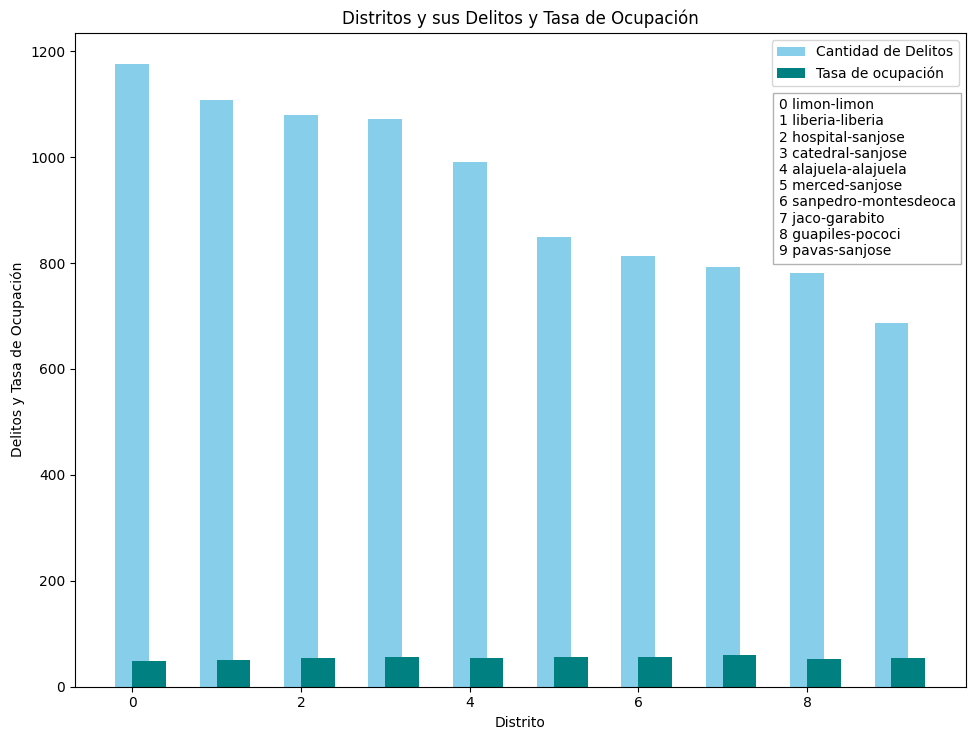

In [31]:
import numpy as np

# Convertir columnas a tipos de datos numéricos
cols = ["Población de 15 años y más", "Tasa neta de participación", "Tasa de ocupación", "Tasa de desempleo abierto", "Porcentaje de población económicamente inactiva", "Relación de dependencia económica", "TotalDelitos"]

for col in cols:
    df_vis_1P[col] = pd.to_numeric(df_vis_1P[col])

# Crear la figura con su tamaño (width, height)
plt.figure(figsize=(10, 7.5))

# Índices de las barras
index = np.arange(len(df_vis_1P['CantonDistrito']))
bar_width = 0.4

# Crear las barras
bar_one = plt.bar(index, df_vis_1P["TotalDelitos"], width = bar_width, label = "Cantidad de Delitos", align = 'center', alpha = 1, color = 'skyblue') # alpha = 1 (opacas), 0 (transparentes)
bar_two = plt.bar(index, df_vis_1P["Tasa de ocupación"], width = bar_width, label = "Tasa de ocupación", align = 'edge', alpha = 1, color = 'teal')

# Establecer los títulos y las leyendas
plt.xlabel("Distrito")
plt.ylabel("Delitos y Tasa de Ocupación")
plt.title("Distritos y sus Delitos y Tasa de Ocupación")
plt.legend()

# Crear un cuadro de texto encima del gráfico para mostrar las etiquetas
labels_text = '\n'.join([f"{i} {district}" for i, district in enumerate(df_vis_1P['CantonDistrito'])])
plt.text(0.79, 0.9, labels_text, transform = plt.gca().transAxes, fontsize = 10, verticalalignment = 'top', bbox = dict(facecolor = 'white', alpha = 0.3))

plt.tight_layout() # Ajustar el espaciado
plt.show()



VI.ii Visualización 2

Esta visualización representa la cantidad de delitos por día de la semana para el distrito con más delitos en el país. Primero, se identifica el distrito con la mayor cantidad de delitos utilizando los resultados de la visualización anterior. Luego, se extraen los datos de delitos para este distrito y se agrupan por día de la semana utilizando funciones de SparkSQL. Estos datos se convierten en un DataFrame de Pandas para facilitar la manipulación y la visualización. Se mapean los nombres de los días de la semana y se ordenan correctamente antes de graficar. La visualización final consiste en un gráfico de barras donde cada barra representa un día de la semana y su altura indica la cantidad de delitos ocurridos en ese día. Además, se agregan etiquetas numéricas sobre cada barra para mostrar la cantidad exacta de delitos. Esto permite observar patrones de comportamiento delictivo a lo largo de la semana en el distrito con mayor incidencia delictiva.

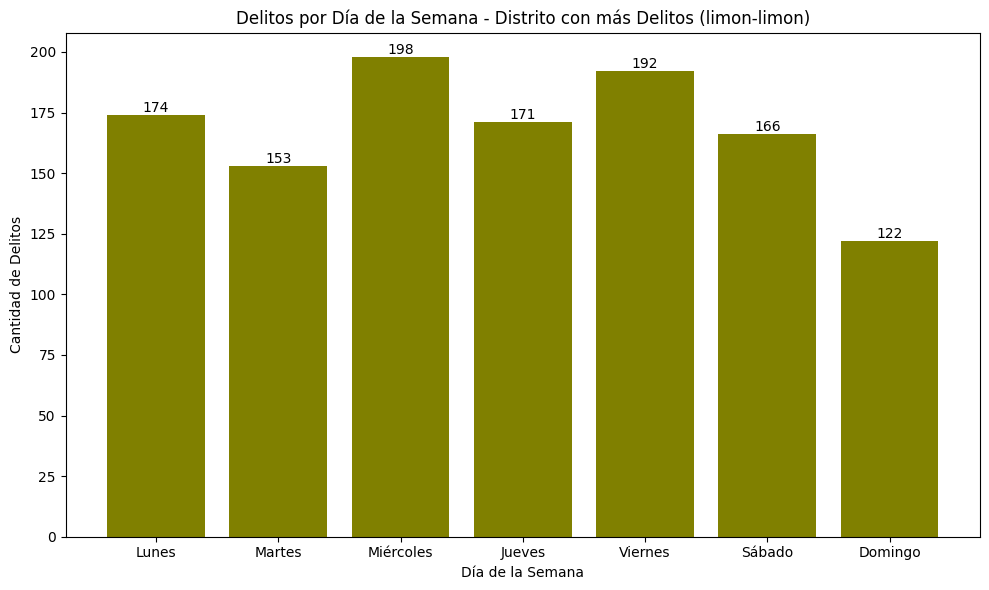

   DiaSemana  CantidadDelitos
6      Lunes              174
2     Martes              153
4  Miércoles              198
3     Jueves              171
1    Viernes              192
5     Sábado              166
0    Domingo              122


In [36]:
# Visualización 2 -  Grafique la cantidad de delitos por día de la semana para el distrito con más delitos.

# Obtener el distrito con más delitos
df_vis_1_top10 = df_vis_1_top10.orderBy(df_vis_1_top10["TotalDelitos"].desc()) # Obtener los 10 distritos con más delitos, ordenados por cantidad de delitos en orden descendente
top_1 = df_vis_1_top10.select('CantonDistrito').first()['CantonDistrito']

# Crear tabla temporal con los datos del distrito con más delitos
df_daily_crimes = spark.sql(f"SELECT DAYOFWEEK(Fecha) as DiaSemana, COUNT(*) as CantidadDelitos FROM OIJview WHERE CantonDistrito = '{top_1}' GROUP BY DAYOFWEEK(Fecha)")

# Convertir DataFrame a Pandas
df_daily_crimesP = df_daily_crimes.toPandas()


# Mapear nombres de los días y ordenarlos
days = {1: 'Domingo', 2: 'Lunes', 3: 'Martes', 4: 'Miércoles', 5: 'Jueves', 6: 'Viernes', 7: 'Sábado'} # Mapeo de nombres de días
df_daily_crimesP['DiaSemana'] = df_daily_crimesP['DiaSemana'].map(days)
df_daily_crimesP['DiaSemana'] = pd.Categorical(df_daily_crimesP['DiaSemana'], categories = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'], ordered = True)
df_daily_crimesP = df_daily_crimesP.sort_values('DiaSemana')

# Crear figura
plt.figure(figsize=(10, 6))
bars = plt.bar(df_daily_crimesP['DiaSemana'], df_daily_crimesP['CantidadDelitos'], color = 'olive')

# Agregar cantidad encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Configuración del gráfico
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad de Delitos')
plt.title(f'Delitos por Día de la Semana - Distrito con más Delitos ({top_1})')

plt.tight_layout()
plt.show()

print(df_daily_crimesP) # Verificar cantidades

VI.iii Visualización 3

Esta visualización representa la cantidad de delitos por tipo y por distrito seleccionado. Primero, solicita al usuario ingresar el distrito y el cantón para los cuales desea visualizar los datos. Luego, se realiza una consulta SQL para obtener la cantidad de delitos por tipo en el distrito y cantón especificados. Estos datos se convierten en un DataFrame de Pandas para su manipulación y visualización. La visualización final consiste en un gráfico de barras horizontales donde cada barra representa un tipo de delito y su longitud indica la cantidad de delitos de ese tipo ocurridos en el distrito y cantón seleccionados. Se agregan etiquetas numéricas al final de cada barra para mostrar la cantidad exacta de delitos. Esto permite visualizar de manera clara y concisa la distribución de los diferentes tipos de delitos en el distrito y cantón seleccionados.

Distrito: limon
Cantón: limon


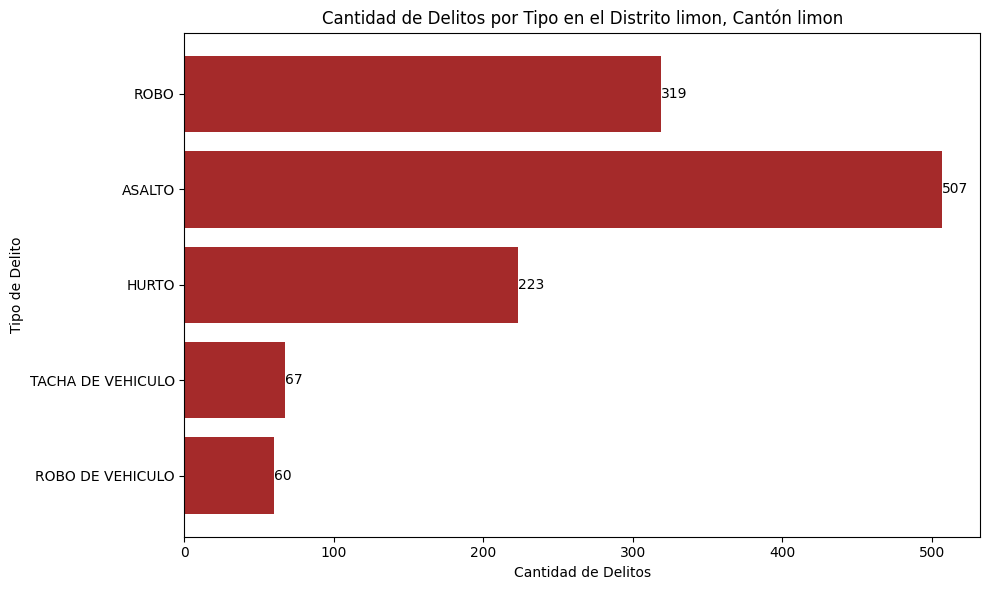

In [37]:
# Visualización 3 - Grafique la cantidad de delitos por tipo y por distrito. Es decir, para el distrito seleccionado se debe graficar la cantidad de delitos por tipo.

# Solicitar al usuario el distrito y el cantón
district = input("Distrito: ")
canton = input("Cantón: ")

# Consulta SQL para obtener los datos de los delitos por tipo y por distrito
query = f"SELECT Delito, COUNT(*) as CantidadDelitos FROM OIJview WHERE Distrito = '{district}' AND Canton = '{canton}' GROUP BY Delito"
df_delitos_por_tipo = spark.sql(query)

# Convertir a Pandas DataFrame
df_delitos_por_tipo_pd = df_delitos_por_tipo.toPandas()

# Crear la figura
plt.figure(figsize=(10, 6))
bars = plt.barh(df_delitos_por_tipo_pd['Delito'], df_delitos_por_tipo_pd['CantidadDelitos'], color = 'brown')

# Agregar la cantidad encima de cada barra
for bar in bars:
    yval = bar.get_width()
    plt.text(yval, bar.get_y() + bar.get_height()/2, round(yval, 2), va='center', ha='left')

# Configuración del gráfico
plt.xlabel('Cantidad de Delitos')
plt.ylabel('Tipo de Delito')
plt.title(f'Cantidad de Delitos por Tipo en el Distrito {district}, Cantón {canton}')

plt.tight_layout()
plt.show()

VI.iv Visualización 4

Esta visualización representa la cantidad de delitos según el sexo de las víctimas en el conjunto de datos completo. Se realiza una consulta SQL para obtener el número de delitos agrupados por género. Los datos obtenidos se convierten en un DataFrame de Pandas para su manipulación y visualización. El gráfico resultante es un diagrama de barras donde cada barra representa un género, y su altura indica la cantidad de delitos asociados a ese género. Se agregan etiquetas numéricas en la parte superior de cada barra para mostrar la cantidad exacta de delitos. Esta visualización permite observar de manera clara la distribución de los delitos en función del sexo de las víctimas, brindando información importante para comprender patrones y tendencias en la criminalidad.

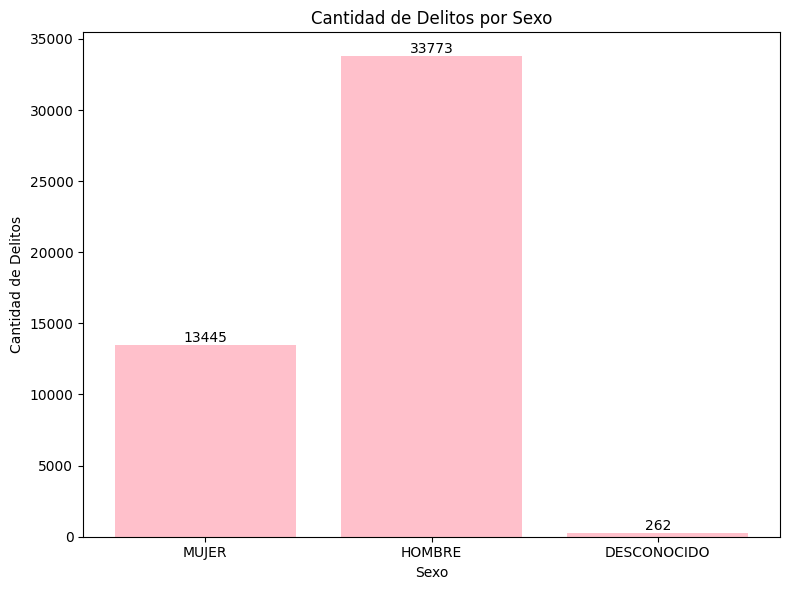

In [41]:
# Visualización 4 -  Grafique la cantidad de delitos por sexo para todo el conjunto de datos.

# Consulta SQL para obtener los datos de los delitos por sexo
query = "SELECT Genero, COUNT(*) as CantidadDelitos FROM OIJview GROUP BY Genero"
df_crimes_by_sex = spark.sql(query)

# Convertir dataFrame a pandas
df_crimes_by_sexP = df_crimes_by_sex.toPandas()

# Crear la figura
plt.figure(figsize=(8, 6))
bars = plt.bar(df_crimes_by_sexP['Genero'], df_crimes_by_sexP['CantidadDelitos'], color = 'pink')

# Agregar la cantidad encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Configuración del gráfico
plt.xlabel('Sexo')
plt.ylabel('Cantidad de Delitos')
plt.title('Cantidad de Delitos por Sexo')

plt.tight_layout()
plt.show()

VI.v Visualización 5

Esta visualización muestra la distribución de los tipos de víctima de delitos según el tipo de delito cometido. Primero, se realiza una consulta SQL para obtener los datos de los tipos de víctima y los tipos de delito, junto con la cantidad de delitos asociados a cada combinación de tipo de víctima y tipo de delito. Luego, estos datos se convierten en un DataFrame de Pandas. Se utiliza una tabla dinámica para organizar los datos por tipo de víctima y tipo de delito, lo que permite representar la información de manera clara y concisa. El gráfico resultante es un gráfico de barras horizontales apiladas, donde cada barra representa un tipo de víctima y las diferentes secciones de cada barra representan los diferentes tipos de delitos. Esto permite visualizar cómo se distribuyen los diferentes tipos de víctimas en relación con los tipos de delitos cometidos, lo que proporciona información valiosa para comprender la relación entre los tipos de víctimas y los tipos de delitos.

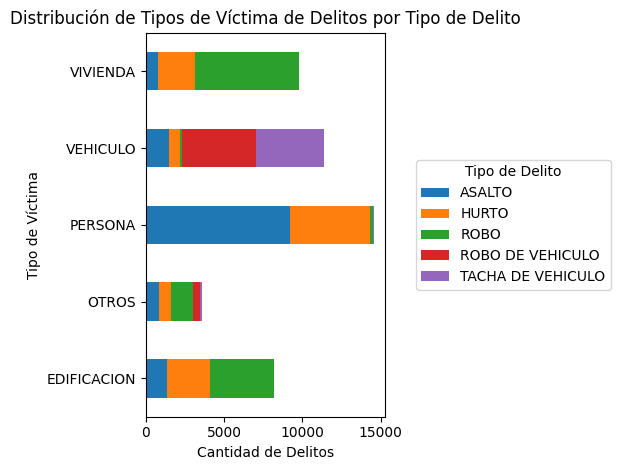

In [42]:
# Visualización 5 - Distribución de tipo de Víctima por tipo de Delito.

# Consulta SQL para obtener los datos de tipos de víctima por tipo de delito
query = "SELECT Victima, Delito, COUNT(*) as CantidadDelitos FROM OIJview GROUP BY Victima, Delito ORDER BY Delito"
df_victimType_by_crime = spark.sql(query)

# Convertir dataFrame a Pandas
df_victimType_by_crimeP = df_victimType_by_crime.toPandas()

# Crear una tabla dinámica para organizar los datos por tipo de víctima y tipo de delito
pivot_table = pd.pivot_table(df_victimType_by_crimeP, values = 'CantidadDelitos', index = 'Victima', columns = 'Delito', aggfunc = 'sum', fill_value = 0)
pivot_table.plot(kind = 'barh', stacked = True, alpha = 1)

# Configuración del gráfico
plt.ylabel('Tipo de Víctima')
plt.xlabel('Cantidad de Delitos')
plt.title('Distribución de Tipos de Víctima de Delitos por Tipo de Delito')
plt.legend(title='Tipo de Delito', loc='center left', bbox_to_anchor=(1.1, 0.5))

plt.tight_layout()
plt.show()

VII Conclusiones respecto a los datos analizados

1. Asociación entre la tasa de ocupación y la criminalidad: La primera visualización que compara la cantidad de delitos con la tasa de ocupación en los 10 distritos con más delitos revela una posible asociación entre la actividad económica y la criminalidad. Se observa que en algunos distritos con altos niveles de delincuencia también hay una alta tasa de ocupación, lo que sugiere una relación compleja entre la actividad económica y la seguridad pública.

2. Variación de la criminalidad a lo largo de la semana: La segunda visualización, que muestra la cantidad de delitos por día de la semana en el distrito con más delitos, revela patrones interesantes sobre la distribución temporal de la criminalidad. Se observa que los fines de semana tienden a tener una mayor incidencia de delitos, lo que puede estar relacionado con el aumento de actividades sociales y recreativas.

3. Perfil de los delitos por tipo de víctima y tipo de delito: La quinta visualización, que presenta la distribución de los tipos de víctima de delitos por tipo de delito, proporciona información detallada sobre los perfiles de los delitos. Se observa una variedad de combinaciones entre los tipos de víctima y los tipos de delitos, lo que sugiere la necesidad de enfoques específicos para abordar diferentes tipos de crímenes y proteger a diferentes grupos de la sociedad. Esta visualización destaca la importancia de comprender la dinámica compleja de la criminalidad para implementar estrategias efectivas de prevención y respuesta.

VIII Referencias

[1] Instituto Nacional de Estadísticas y Censos (2011). Censo 2011: Indicadores económicos, según provincia, cantón y distrito. Recuperado de https://admin.inec.cr/sites/default/files/media/reempleocenso2011-22.xls_2.xls

[2] Organismo de Investigación Judicial (2018). Estadísticas policiales. Recuperado de https://sitiooij.poder-judicial.go.cr/index.php/apertura/transparencia/estadisticas-policiales

[3] Suhong, K., Param, J., Parminder, K. y Pooya, T. (2018). Crime Analysis Through Machine Learning. IEEE 9th Annual Information Technology, Electronics and Mobile Communication Conference (IEMCON).

[4] YouTube. (s.f.). How to Make Bar Graphs - Matplotlib Tutorial - Python Plotly. Recuperado de https://www.youtube.com/watch?v=FIXanNPvBXM

[5] YouTube. (s.f.). Bar Graphs & Subplots - Matplotlib Tutorial (Python). Recuperado de https://www.youtube.com/watch?v=pmwwX_B7EtQ

[6] GeeksforGeeks. (s.f.). Matplotlib.pyplot.figure() in Python. Recuperado de https://www.geeksforgeeks.org/matplotlib-pyplot-figure-in-python/

[7] W3Schools. (s.f.). Matplotlib Bars. Recuperado de https://www.w3schools.com/python/matplotlib_bars.asp

[8] Stack Overflow. (s.f.). Using PySpark to Connect to PostgreSQL. Recuperado de https://stackoverflow.com/questions/34948296/using-pyspark-to-connect-to-postgresql

In [43]:
# Conexión con PostgreSQL
PSQL_SERVERNAME = "localhost"
PSQL_PORTNUMBER = 5432
POSTGRESQL_URL = "jdbc:postgresql://localhost:5432/BD2_P3"
POSTGRESQL_USER = "postgres"
POSTGRESQL_PASSWORD = "postgresPass"


# -------------------------------------------------------------------------------------------------------------------
# Función: write_spark_to_db
# Descripción: Escribe un DataFrame de Spark en una tabla de base de datos utilizando JDBC.
# Parámetros de entrada:
#   - df: DataFrame de Spark que se va a escribir en la base de datos.
#   - table_name: Nombre de la tabla de la base de datos donde se guardarán los datos.
# Salida: Esta función no devuelve ningún valor explícito (es decir, None).
# Bloques Relevantes:
#   - El bloque .write especifica el formato ("jdbc") y el modo ("overwrite").
#   - Los bloques .option establecen los parámetros de conexión a la base de datos (url, usuario, contraseña, tabla).
#   - El bloque .save() ejecuta la operación de escritura.
# -------------------------------------------------------------------------------------------------------------------
def write_spark_df_to_db(spark_df, table_name):
    spark_df \
        .write \
        .format("jdbc") \
        .mode('overwrite') \
        .option("url", POSTGRESQL_URL) \
        .option("user", POSTGRESQL_USER) \
        .option("password", POSTGRESQL_PASSWORD) \
        .option("dbtable", table_name) \
        .save()


# Guardar los datos limpios del INEC en PostgreSQL
write_spark_df_to_db(df_INEC_spark, "inec")

# Guardar los datos limpios del OIJ en PostgreSQL
write_spark_df_to_db(df_OIJ_spark, "oij")


Py4JJavaError: An error occurred while calling o408.save.
: java.sql.SQLException: No suitable driver
	at java.sql/java.sql.DriverManager.getDriver(DriverManager.java:298)
	at org.apache.spark.sql.execution.datasources.jdbc.JDBCOptions.$anonfun$driverClass$2(JDBCOptions.scala:109)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.sql.execution.datasources.jdbc.JDBCOptions.<init>(JDBCOptions.scala:109)
	at org.apache.spark.sql.execution.datasources.jdbc.JdbcOptionsInWrite.<init>(JDBCOptions.scala:254)
	at org.apache.spark.sql.execution.datasources.jdbc.JdbcOptionsInWrite.<init>(JDBCOptions.scala:258)
	at org.apache.spark.sql.execution.datasources.jdbc.JdbcRelationProvider.createRelation(JdbcRelationProvider.scala:47)
	at org.apache.spark.sql.execution.datasources.SaveIntoDataSourceCommand.run(SaveIntoDataSourceCommand.scala:48)
	at org.apache.spark.sql.execution.command.ExecutedCommandExec.sideEffectResult$lzycompute(commands.scala:75)
	at org.apache.spark.sql.execution.command.ExecutedCommandExec.sideEffectResult(commands.scala:73)
	at org.apache.spark.sql.execution.command.ExecutedCommandExec.executeCollect(commands.scala:84)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.$anonfun$applyOrElse$1(QueryExecution.scala:107)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:125)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:201)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:108)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:900)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:66)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.applyOrElse(QueryExecution.scala:107)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.applyOrElse(QueryExecution.scala:98)
	at org.apache.spark.sql.catalyst.trees.TreeNode.$anonfun$transformDownWithPruning$1(TreeNode.scala:461)
	at org.apache.spark.sql.catalyst.trees.CurrentOrigin$.withOrigin(origin.scala:76)
	at org.apache.spark.sql.catalyst.trees.TreeNode.transformDownWithPruning(TreeNode.scala:461)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.org$apache$spark$sql$catalyst$plans$logical$AnalysisHelper$$super$transformDownWithPruning(LogicalPlan.scala:32)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.transformDownWithPruning(AnalysisHelper.scala:267)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.transformDownWithPruning$(AnalysisHelper.scala:263)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.transformDownWithPruning(LogicalPlan.scala:32)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.transformDownWithPruning(LogicalPlan.scala:32)
	at org.apache.spark.sql.catalyst.trees.TreeNode.transformDown(TreeNode.scala:437)
	at org.apache.spark.sql.execution.QueryExecution.eagerlyExecuteCommands(QueryExecution.scala:98)
	at org.apache.spark.sql.execution.QueryExecution.commandExecuted$lzycompute(QueryExecution.scala:85)
	at org.apache.spark.sql.execution.QueryExecution.commandExecuted(QueryExecution.scala:83)
	at org.apache.spark.sql.execution.QueryExecution.assertCommandExecuted(QueryExecution.scala:142)
	at org.apache.spark.sql.DataFrameWriter.runCommand(DataFrameWriter.scala:859)
	at org.apache.spark.sql.DataFrameWriter.saveToV1Source(DataFrameWriter.scala:388)
	at org.apache.spark.sql.DataFrameWriter.saveInternal(DataFrameWriter.scala:361)
	at org.apache.spark.sql.DataFrameWriter.save(DataFrameWriter.scala:248)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)
